In [51]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

In [63]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [34]:
#data_B120N10_benign = pd.read_csv('.\\data\\Philips_B120N10_Baby_Monitor\\benign_traffic.csv')
data_PT_838_benign = pd.read_csv('.\\data\\Provision_PT_838_Security_Camera\\benign_traffic.csv')
data_PT_838_benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98514 entries, 0 to 98513
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 86.4 MB


We have around 100000 benign entries and ~300000 botnet entries. As we would like these two to be roughly the same size, we will drop 2/3 of the botnet dataframes

In [40]:
data_PT_838_combo = pd.read_csv('.\\data\\Provision_PT_838_Security_Camera\\combo.csv')
df_one_third = data_PT_838_combo.shape[0]//3
data_PT_838_combo.drop(data_PT_838_combo.index[df_one_third:], inplace=True)
data_PT_838_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19176 entries, 0 to 19175
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 17.0 MB


In [41]:
data_PT_838_junk = pd.read_csv('.\\data\\Provision_PT_838_Security_Camera\\junk.csv')
df_one_third = data_PT_838_junk.shape[0]//3
data_PT_838_junk.drop(data_PT_838_junk.index[df_one_third:], inplace=True)
data_PT_838_junk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9689 entries, 0 to 9688
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 8.6 MB


In [42]:
data_PT_838_scan = pd.read_csv('.\\data\\Provision_PT_838_Security_Camera\\scan.csv')
df_one_third = data_PT_838_scan.shape[0]//3
data_PT_838_scan.drop(data_PT_838_scan.index[df_one_third:], inplace=True)
data_PT_838_scan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9465 entries, 0 to 9464
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 8.4 MB


In [43]:
data_PT_838_tcp = pd.read_csv('.\\data\\Provision_PT_838_Security_Camera\\tcp.csv')
df_one_third = data_PT_838_tcp.shape[0]//3
data_PT_838_tcp.drop(data_PT_838_tcp.index[df_one_third:], inplace=True)
data_PT_838_tcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29795 entries, 0 to 29794
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 26.4 MB


In [44]:
data_PT_838_udp = pd.read_csv('.\\data\\Provision_PT_838_Security_Camera\\udp.csv')
df_one_third = data_PT_838_udp.shape[0]//3
data_PT_838_udp.drop(data_PT_838_udp.index[df_one_third:], inplace=True)
data_PT_838_udp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34886 entries, 0 to 34885
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 30.9 MB


In [45]:
data_PT_838_botnet = pd.concat([data_PT_838_combo, data_PT_838_junk, data_PT_838_scan, data_PT_838_tcp, data_PT_838_udp], ignore_index=True)
data_PT_838_botnet.shape[0]

103011

In [50]:
data_PT_838_botnet['Botnet'] = 1
data_PT_838_benign['Botnet'] = 0
data_PT_838 = pd.concat([data_PT_838_benign, data_PT_838_botnet], ignore_index=True)
data_PT_838 = shuffle(data_PT_838)
data_PT_838.head(10)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Botnet
18207,1.999993,90.000000,0.000000,1.999996,90.000000,0.000000,1.999999,90.000000,8.220000e-10,2.337672,...,-2.690000e-14,-9.090000e-09,4.223581,88.744149,6.008192e+00,107.185303,3.609896e+01,-0.137972,-0.050448,0
186729,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000,0.000000,1
143278,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000,0.000000,1
164045,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000,0.000000,1
132013,72.232453,74.075807,2.852652,104.777599,74.151025,21.526674,217.052273,74.959250,3.014050e+02,960.444632,...,0.000000e+00,0.000000e+00,1.979351,74.000000,9.536743e-07,74.000000,9.094947e-13,0.000000,0.000000,1
133770,89.135441,74.089850,2.148340,131.808820,74.105021,2.524560,269.739374,74.188026,1.574346e+01,1054.148982,...,0.000000e+00,0.000000e+00,1.979317,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000,0.000000,1
25069,29.270645,169.276057,49781.518620,32.489427,167.516839,48863.619660,36.978321,163.451175,4.712464e+04,48.815096,...,2.637309e+04,3.816369e-01,4.999716,198.396377,2.608158e+02,347.874917,9.775889e+04,26390.384420,0.381868,0
165733,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000,0.000000,1
149808,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000,0.000000,1
41546,7.805264,83.339762,1618.370453,7.885971,83.400351,1623.481710,8.552602,87.946825,4.916046e+03,81.172039,...,0.000000e+00,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000,0.000000,0


In [59]:
data_PT_838.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Botnet
count,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,2.015250e+05,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,201525.000000,2.015250e+05,201525.000000,201525.000000,201525.000000
mean,30.643511,81.896855,6105.407720,47.633819,81.863774,6126.888932,128.577424,82.509746,6626.112000,810.641036,84.686632,8185.215189,1663.998641,86.065212,9284.913460,30.643511,81.896855,6105.407720,47.633819,81.863774,6126.888932,128.577424,82.509746,6626.112000,810.641036,84.686632,8185.215251,1663.998675,86.063888,9285.063392,27.688042,82.049692,27.142139,127.442302,27736.952466,-1634.555551,-0.004895,43.454626,81.953658,27.275933,128.755389,28471.127352,-1894.343709,-0.008351,119.646148,82.261874,2.897482e+01,129.285756,2.876080e+04,-2.153230e+03,-1.270354e-02,754.744174,83.998413,34.895467,125.65

In [96]:
x = data_PT_838.corr()['Botnet'].drop(['Botnet']).abs().sort_values(ascending=True)

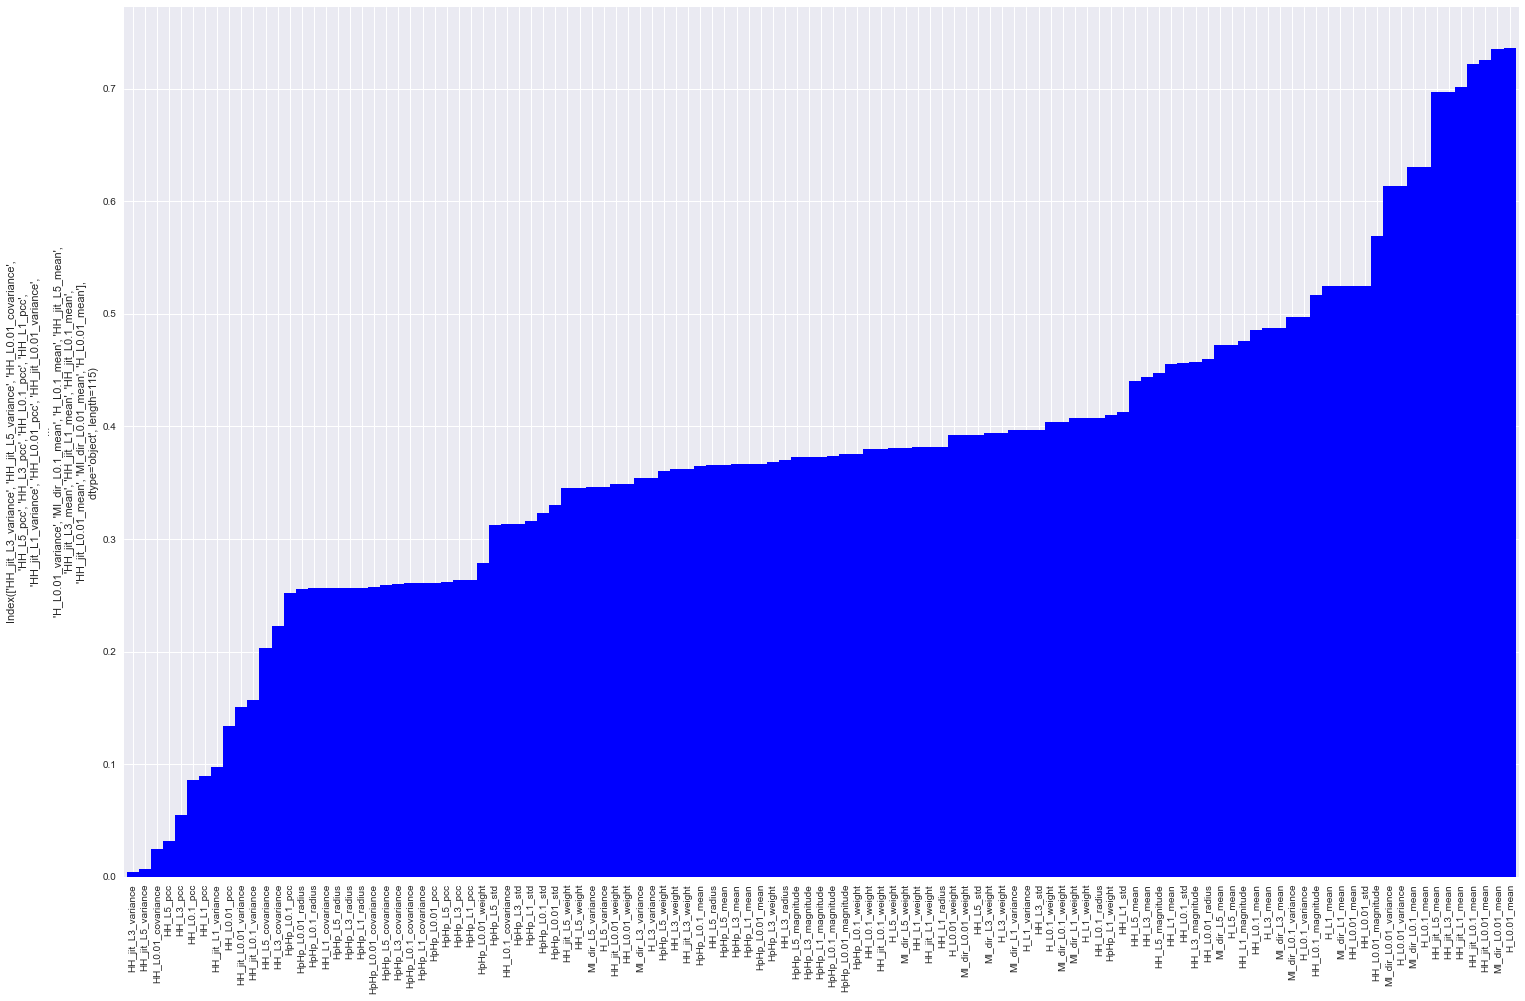

In [101]:
'''plt.figure(figsize=(20, 16))
sns.heatmap(data_PT_838.corr(), 
            linewidths=0.05, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()'''
#lol, nope
fig = plt.figure(figsize=(25, 16))
ax = fig.add_subplot(111)
x.plot(kind='bar', color='blue', ax=ax, width=1)
ax.set_ylabel(x.index)

plt.show()

Get labels with low correlation

In [110]:
columns_low_corr = x.where(x < 0.5).dropna().index
columns_low_corr

Index(['HH_jit_L3_variance', 'HH_jit_L5_variance', 'HH_L0.01_covariance',
       'HH_L5_pcc', 'HH_L3_pcc', 'HH_L0.1_pcc', 'HH_L1_pcc',
       'HH_jit_L1_variance', 'HH_L0.01_pcc', 'HH_jit_L0.01_variance',
       'HH_jit_L0.1_variance', 'HH_L5_covariance', 'HH_L3_covariance',
       'HpHp_L0.1_pcc', 'HpHp_L0.01_radius', 'HpHp_L0.1_radius',
       'HH_L1_covariance', 'HpHp_L5_radius', 'HpHp_L3_radius',
       'HpHp_L1_radius', 'HpHp_L0.01_covariance', 'HpHp_L5_covariance',
       'HpHp_L3_covariance', 'HpHp_L0.1_covariance', 'HpHp_L1_covariance',
       'HpHp_L0.01_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc',
       'HpHp_L0.01_weight', 'HpHp_L5_std', 'HH_L0.1_covariance', 'HpHp_L3_std',
       'HpHp_L1_std', 'HpHp_L0.1_std', 'HpHp_L0.01_std', 'HH_jit_L5_weight',
       'HH_L5_weight', 'MI_dir_L5_variance', 'H_L5_variance',
       'HH_jit_L0.01_weight', 'HH_L0.01_weight', 'MI_dir_L3_variance',
       'H_L3_variance', 'HpHp_L5_weight', 'HH_L3_weight', 'HH_jit_L3_weight',
       'HpH

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
tmp = data_PT_838.drop(columns_low_corr, axis=1)
y = tmp['Botnet']
X = tmp.drop(['Botnet'], axis=1)
skfold = StratifiedKFold(n_splits=10, random_state=42)
cv = skfold.split(X, y)
rfc = RandomForestClassifier(n_jobs=-1, 
                             max_features='auto' ,
                             n_estimators=50, 
                             random_state=42)
scores = cross_val_score(rfc, X, y, cv=cv, scoring='precision')
print('Score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))

Score: 1.000 ± 0.000
